In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9Ve9TkzxVDClcRL0DA7U")
project = rf.workspace("pankajs-workspace").project("image-seg-0kxrq")
version = project.version(1)
dataset = version.download("coco")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Image-Seg-1 in coco:: 100%|██████████| 8/8 [00:00<00:00, 1059.33it/s]


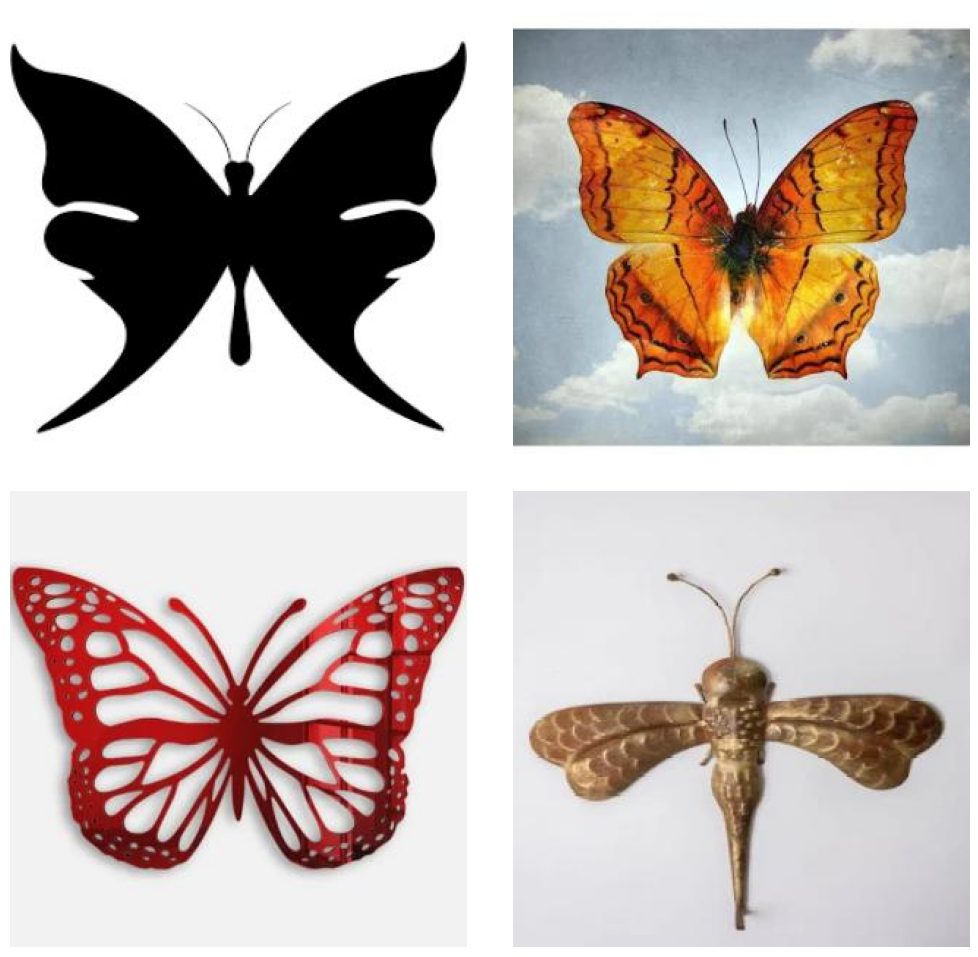

In [7]:
import matplotlib.pyplot as plt
import os

images=sorted(os.listdir('/content/Image-Seg-1/train'))[1:]
plt.figure(figsize=(10,10))
for i in range(len(images)):
  plt.subplot(2,2,i+1)
  plt.tight_layout()
  plt.imshow(plt.imread('/content/Image-Seg-1/train/'+images[i]))
  plt.axis('off')

In [10]:
import json
annotations=json.load(open('/content/Image-Seg-1/train/_annotations.coco.json'))

In [12]:
from pycocotools import mask as coco_mask
import numpy as np

mask=np.zeros((annotations['images'][0]['height'],annotations['images'][0]['width']))

In [23]:
import cv2
def create_binary_mask(segmentation,ht,wd):
  mask=np.zeros((ht,wd))

  for seg in segmentation:
    x=len(seg)
    coord=np.array(seg).reshape(x//2,2)
    cv2.fillPoly(mask,[np.int32(coord)],1)
  return mask

time taken to generate mask is  0.0009210109710693359  seconds


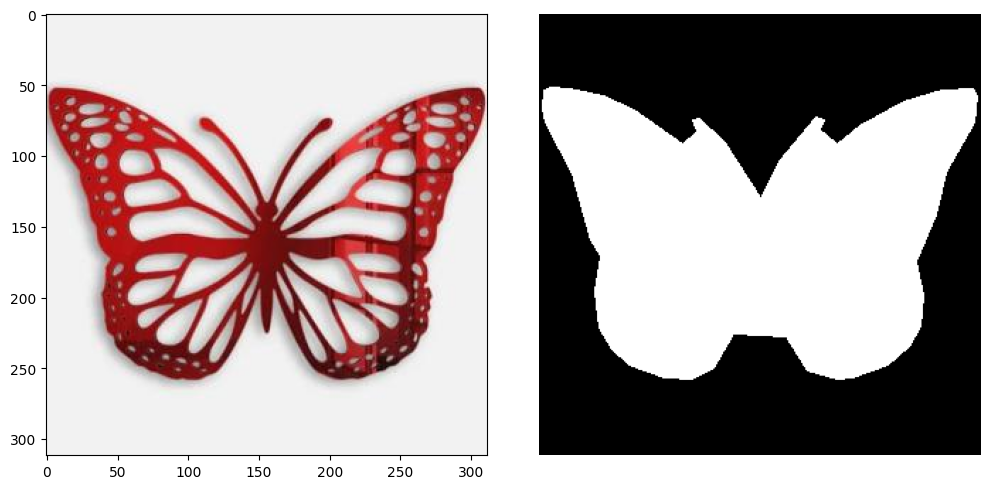

time taken to generate mask is  0.0005490779876708984  seconds


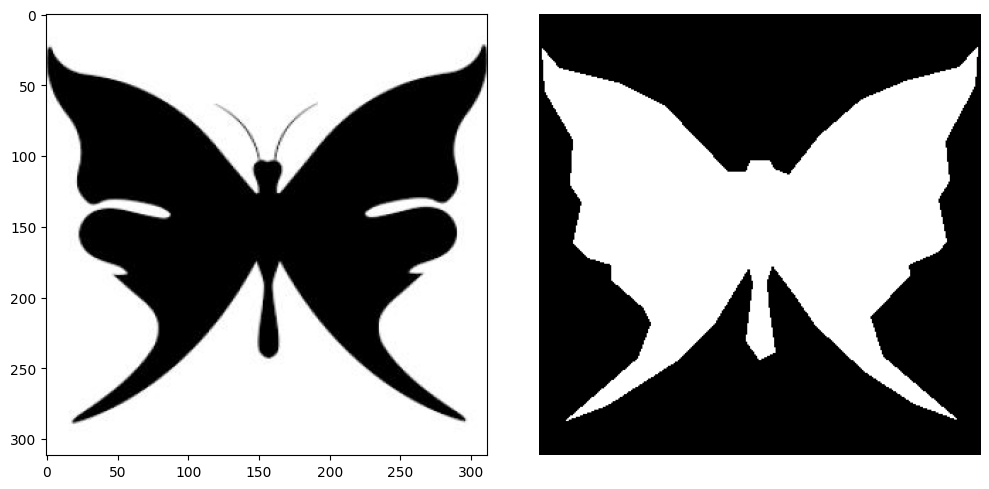

time taken to generate mask is  0.0006985664367675781  seconds


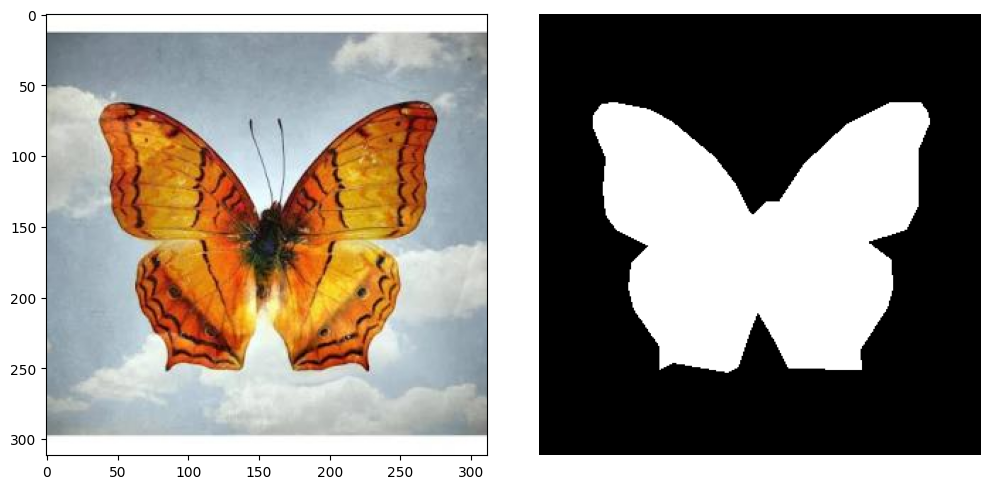

time taken to generate mask is  0.0006167888641357422  seconds


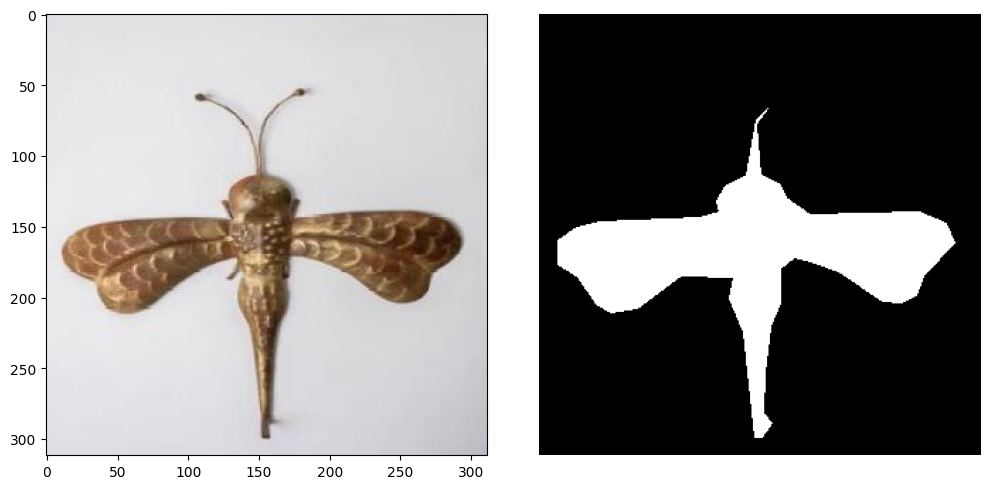

In [29]:
import time

for i in range(len(annotations['annotations'])):
  segmentation=annotations['annotations'][i]['segmentation']
  start_time=time.time()
  mask=create_binary_mask(segmentation,annotations['images'][0]['height'],annotations['images'][0]['width'])
  end_time=time.time()
  print("time taken to generate mask is ",end_time-start_time ," seconds")
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.imshow(plt.imread('/content/Image-Seg-1/train/'+annotations['images'][i]['file_name']))
  plt.subplot(1,2,2)
  plt.imshow(mask,cmap='grey')
  plt.tight_layout()
  plt.axis('off')
  plt.show()